In [1]:
#importing necessary packages
import numpy as np
import math
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.nn.modules.activation import ReLU
from torch import optim
from torchvision import datasets
from torchvision import transforms
from torch.utils.data import random_split
from torch.utils.data import DataLoader

In [2]:
#Importing data from pytorch
rawData = datasets.MNIST('data', train = True, download = True, transform = transforms.ToTensor())
trainData, validationData = random_split(rawData, [50000, 10000])
trainData = DataLoader(trainData, batch_size = 32)
validData = DataLoader(validationData, batch_size = 32)

testData = datasets.MNIST('data', train = False, download = True, transform = transforms.ToTensor())
testData = DataLoader(testData, batch_size = 32)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data\MNIST\raw\train-images-idx3-ubyte.gz to data\MNIST\raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data\MNIST\raw\train-labels-idx1-ubyte.gz to data\MNIST\raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data\MNIST\raw\t10k-images-idx3-ubyte.gz to data\MNIST\raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data\MNIST\raw\t10k-labels-idx1-ubyte.gz to data\MNIST\raw



# Part A: DNNs


In [3]:
#Initializing some variables
imageSize = 28 * 28
noOfNeuronsInHiddenLayer = 512
noOfClasses = 10

In [4]:
#Creating object for DNN with 2 hidden layer
obj_2HiddenLayer = nn.Sequential(
    nn.Linear(imageSize, noOfNeuronsInHiddenLayer),
    nn.ReLU(),
    
    nn.Linear(noOfNeuronsInHiddenLayer, noOfNeuronsInHiddenLayer),
    nn.ReLU(),
    
    nn.Linear(noOfNeuronsInHiddenLayer, noOfClasses)
)

In [5]:
#Creating object for DNN with 3 hidden layer
obj_3HiddenLayer = nn.Sequential(
    nn.Linear(imageSize, noOfNeuronsInHiddenLayer),
    nn.ReLU(),
    
    nn.Linear(noOfNeuronsInHiddenLayer, noOfNeuronsInHiddenLayer),
    nn.ReLU(),
    
    nn.Linear(noOfNeuronsInHiddenLayer, noOfNeuronsInHiddenLayer),
    nn.ReLU(),
    
    nn.Linear(noOfNeuronsInHiddenLayer, noOfClasses)
)

In [6]:
#Initializing Loss Function and optimizer with parameters
lossFunc = nn.CrossEntropyLoss()
optmizer_2HiddenLayer = optim.Adam(obj_2HiddenLayer.parameters(), lr = 1e-2)
optmizer_3HiddenLayer = optim.Adam(obj_3HiddenLayer.parameters(), lr = 1e-2)

In [7]:
class DNN:
    def __init__(self, epochs,nLayers,NNobj,optimizer):
        self.epochs = epochs
        self.trainLossList = []
        self.validLossList = []
        self.trainLossListPlotting = []
        self.validLossListPlotting = []
        
        self.optimizer = optimizer
        self.NNobj = NNobj
        self.accuracyList = []
        
    def fit(self):
        for i in range(self.epochs):
            self.trainLossList = []
            self.validLossList = []
            for batch in trainData:
                x, y = batch
                b = x.size(0)
                x = x.view(b, -1)

                forwardValue = self.NNobj(x)
                costFunction_J = lossFunc(forwardValue, y)
                self.NNobj.zero_grad()
                costFunction_J.backward()
                self.optimizer.step()
                self.trainLossList.append(costFunction_J.item())
                
            for batch in validData:
                x, y = batch
                temp = x.size(0)
                x = x.view(temp, -1)

                with torch.no_grad():
                    forwardValue = self.NNobj(x)
                costFunction_J = lossFunc(forwardValue, y)
                self.validLossList.append(costFunction_J.item())
            
            self.trainLossListPlotting.append(torch.tensor(self.trainLossList).mean())
            self.validLossListPlotting.append(torch.tensor(self.validLossList).mean())
            
            print('At Epoch Number: ' + str(i+1) +'; Train Loss= ' + str("{:.2f}".format(torch.tensor(self.trainLossList).mean()))+'; Validation Loss= ' + str("{:.2f}".format(torch.tensor(self.validLossList).mean())))

    def predict(self):
        accuracyListPred = []
        for batch in testData:
            x, y = batch
            b = x.size(0)
            x = x.view(b, -1)

            with torch.no_grad():
                forwardValue = self.NNobj(x)
                
            accuracyListPred.append(y.eq(forwardValue.detach().argmax(dim = 1)).float().mean())
        accuracy = torch.tensor(accuracyListPred).mean() * 100
        print('\033[1m' + "Review Classification Accuracy on Test Data = ", "{:.2f}".format(accuracy), " %" + '\033[0m' )
        
    def plotLossCurve(self, flag):
        x = [(i+1) for i in range(self.epochs)]
        plt.xlabel('#Epoch')
        plt.ylabel('Loss')
        tempStr = "Loss curve for "
        if(flag == 0):
            tempStr += "Train Data"
            plt.plot(x,self.trainLossListPlotting)
        else:
            tempStr += "Validation Data"
            plt.plot(x,self.validLossListPlotting)
        plt.title(tempStr)
        plt.show()

# No of Hidden Layers = 2

At Epoch Number: 1; Train Loss= 0.33; Validation Loss= 0.23
At Epoch Number: 2; Train Loss= 0.20; Validation Loss= 0.20
At Epoch Number: 3; Train Loss= 0.17; Validation Loss= 0.24
At Epoch Number: 4; Train Loss= 0.15; Validation Loss= 0.21
At Epoch Number: 5; Train Loss= 0.14; Validation Loss= 0.23
At Epoch Number: 6; Train Loss= 0.14; Validation Loss= 0.21
At Epoch Number: 7; Train Loss= 0.12; Validation Loss= 0.24
At Epoch Number: 8; Train Loss= 0.13; Validation Loss= 0.21
At Epoch Number: 9; Train Loss= 0.11; Validation Loss= 0.24
At Epoch Number: 10; Train Loss= 0.11; Validation Loss= 0.22
At Epoch Number: 11; Train Loss= 0.11; Validation Loss= 0.27
At Epoch Number: 12; Train Loss= 0.11; Validation Loss= 0.28
At Epoch Number: 13; Train Loss= 0.10; Validation Loss= 0.25
At Epoch Number: 14; Train Loss= 0.10; Validation Loss= 0.26
At Epoch Number: 15; Train Loss= 0.09; Validation Loss= 0.27


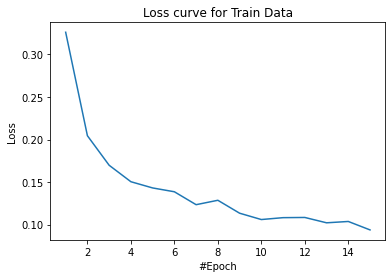

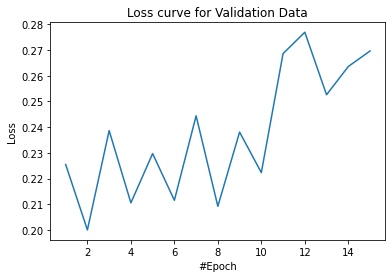

Review Classification Accuracy on Test Data =  96.29  %


In [8]:
tempObj2 = DNN(15,2,obj_2HiddenLayer,optmizer_2HiddenLayer)
tempObj2.fit()
tempObj2.plotLossCurve(0)
tempObj2.plotLossCurve(1)
tempObj2.predict()

# No of Hidden Layers = 3

At Epoch Number: 1; Train Loss= 0.41; Validation Loss= 0.29
At Epoch Number: 2; Train Loss= 0.26; Validation Loss= 0.23
At Epoch Number: 3; Train Loss= 0.20; Validation Loss= 0.25
At Epoch Number: 4; Train Loss= 0.20; Validation Loss= 0.26
At Epoch Number: 5; Train Loss= 0.18; Validation Loss= 0.21
At Epoch Number: 6; Train Loss= 0.17; Validation Loss= 0.22
At Epoch Number: 7; Train Loss= 0.16; Validation Loss= 0.23
At Epoch Number: 8; Train Loss= 0.16; Validation Loss= 0.25
At Epoch Number: 9; Train Loss= 0.15; Validation Loss= 0.28
At Epoch Number: 10; Train Loss= 0.17; Validation Loss= 0.29
At Epoch Number: 11; Train Loss= 0.14; Validation Loss= 0.35
At Epoch Number: 12; Train Loss= 0.14; Validation Loss= 0.26
At Epoch Number: 13; Train Loss= 0.14; Validation Loss= 0.24
At Epoch Number: 14; Train Loss= 0.13; Validation Loss= 0.24
At Epoch Number: 15; Train Loss= 0.15; Validation Loss= 0.24


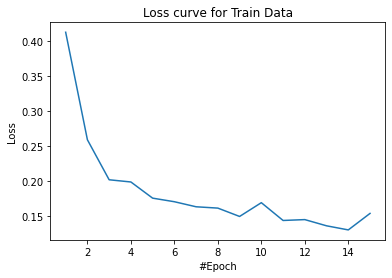

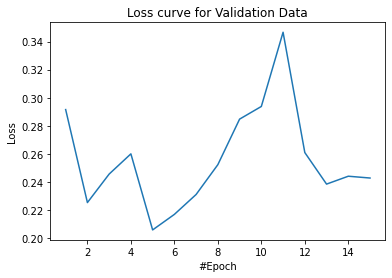

Review Classification Accuracy on Test Data =  96.19  %


In [9]:
tempObj3 = DNN(15,3,obj_3HiddenLayer,optmizer_3HiddenLayer)
tempObj3.fit()
tempObj3.plotLossCurve(0)
tempObj3.plotLossCurve(1)
tempObj3.predict()

# Part B: CNN

In [10]:
nFilters = 128
noOfNeuronsInHiddenLayer = 256
obj_CNN = nn.Sequential(
    nn.Conv2d(1, nFilters, kernel_size=3, stride=1, padding=1),
    nn.ReLU(),
    nn.Flatten(),
    nn.Linear(imageSize*nFilters, noOfNeuronsInHiddenLayer),
    nn.ReLU(),
    nn.Linear(noOfNeuronsInHiddenLayer, noOfNeuronsInHiddenLayer),
    nn.ReLU(),
    nn.Linear(noOfNeuronsInHiddenLayer, noOfClasses)
)

In [11]:
class CNN:
    def __init__(self, epochs, tempObj):
        self.epochs = epochs
        self.trainLossList = []
        self.validLossList = []
        self.trainLossListPlotting = []
        self.validLossListPlotting = []
        
        self.optimizer = optim.SGD(obj_CNN.parameters(), lr = 1e-2)
        self.NNobj = tempObj

    def fit(self):
        for i in range(self.epochs):
            self.trainLossList = []
            for j, (x, y) in enumerate(trainData):

                forwardValue = self.NNobj(x)
                costFunction_J = lossFunc(forwardValue, y)
                self.NNobj.zero_grad()
                costFunction_J.backward()
                self.optimizer.step()
                self.trainLossList.append(costFunction_J.item())

            self.validLossList = []
            for j, (x, y) in enumerate(validData):
                with torch.no_grad():
                    forwardValue = self.NNobj(x)
                costFunction_J = lossFunc(forwardValue, y)
                self.validLossList.append(costFunction_J.item())

            self.trainLossListPlotting.append(torch.tensor(self.trainLossList).mean())
            self.validLossListPlotting.append(torch.tensor(self.validLossList).mean())
                                              
            print('At Epoch Number: ' + str(i+1) +'; Train Loss= ' + str("{:.2f}".format(torch.tensor(self.trainLossList).mean()))+'; Validation Loss= ' + str("{:.2f}".format(torch.tensor(self.validLossList).mean())))

    def predict(self):
        accuracyListPred = []
        for j, (x, y) in enumerate(testData):
            with torch.no_grad():
                forwardValue = self.NNobj(x)
                
            accuracyListPred.append(y.eq(forwardValue.detach().argmax(dim = 1)).float().mean())
        accuracy = torch.tensor(accuracyListPred).mean() * 100
        print('\033[1m' + "Review Classification Accuracy on Test Data = ", "{:.2f}".format(accuracy), " %" + '\033[0m' )
        
    def plotLossCurve(self, flag):
        x = [(i+1) for i in range(self.epochs)]
        plt.xlabel('#Epoch')
        plt.ylabel('Loss')
        tempStr = "Loss curve for "
        if(flag == 0):
            tempStr += "Train Data"
            plt.plot(x,self.trainLossListPlotting)
        else:
            tempStr += "Validation Data"
            plt.plot(x,self.validLossListPlotting)
        plt.title(tempStr)
        plt.show()

At Epoch Number: 1; Train Loss= 0.49; Validation Loss= 0.32
At Epoch Number: 2; Train Loss= 0.21; Validation Loss= 0.22
At Epoch Number: 3; Train Loss= 0.15; Validation Loss= 0.17
At Epoch Number: 4; Train Loss= 0.12; Validation Loss= 0.14
At Epoch Number: 5; Train Loss= 0.10; Validation Loss= 0.12
At Epoch Number: 6; Train Loss= 0.08; Validation Loss= 0.11
At Epoch Number: 7; Train Loss= 0.07; Validation Loss= 0.10
At Epoch Number: 8; Train Loss= 0.06; Validation Loss= 0.09
At Epoch Number: 9; Train Loss= 0.05; Validation Loss= 0.08
At Epoch Number: 10; Train Loss= 0.04; Validation Loss= 0.08


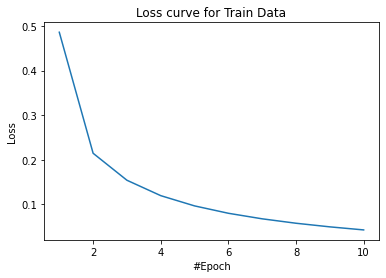

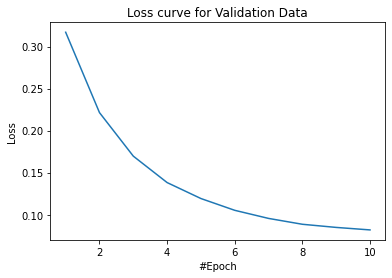

Review Classification Accuracy on Test Data =  97.77  %


In [12]:
tempObj = CNN(10,obj_CNN)
tempObj.fit()
tempObj.plotLossCurve(0)
tempObj.plotLossCurve(1)
tempObj.predict()

With the given filter size and kernel, I am getting an accuracy of 97.85 in CNN, and in DNN accuracy = 95.24 with 3 hidden layers and accuracy = 96.16 with 2 hidden layers.

For DNNs and CNNs, Train Loss and Validation Loss at each epoch is provided. Also, the loss curve is provided.


# Part C: Various Choices

Filter Size = 3; No of Neurons in Hidden Layer = 128
At Epoch Number: 1; Train Loss= 0.50; Validation Loss= 0.31
At Epoch Number: 2; Train Loss= 0.21; Validation Loss= 0.21
At Epoch Number: 3; Train Loss= 0.15; Validation Loss= 0.16


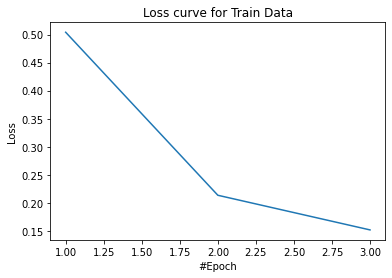

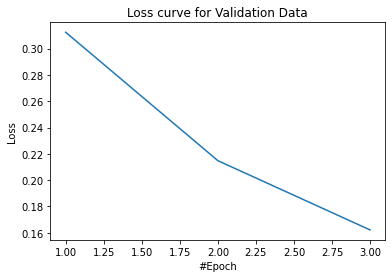

Review Classification Accuracy on Test Data =  95.83  %
--------------------------------------------------------
Filter Size = 3; No of Neurons in Hidden Layer = 256
At Epoch Number: 1; Train Loss= 0.51; Validation Loss= 0.32
At Epoch Number: 2; Train Loss= 0.22; Validation Loss= 0.22
At Epoch Number: 3; Train Loss= 0.15; Validation Loss= 0.17


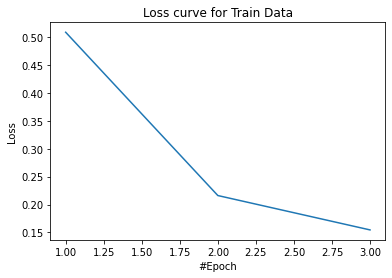

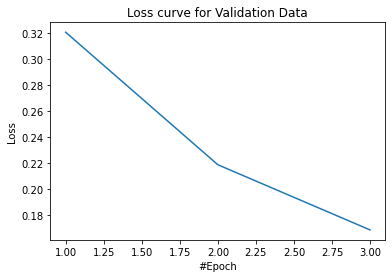

Review Classification Accuracy on Test Data =  95.64  %
--------------------------------------------------------
Filter Size = 5; No of Neurons in Hidden Layer = 128
At Epoch Number: 1; Train Loss= 0.47; Validation Loss= 0.31
At Epoch Number: 2; Train Loss= 0.20; Validation Loss= 0.21
At Epoch Number: 3; Train Loss= 0.14; Validation Loss= 0.16


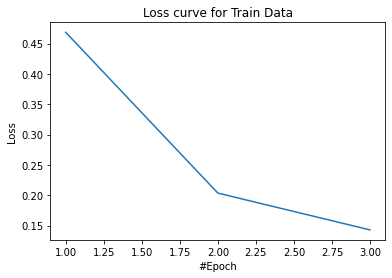

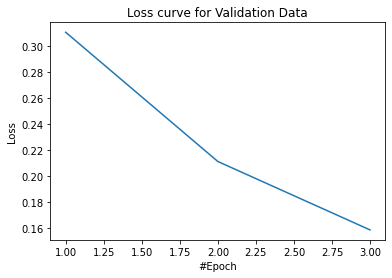

Review Classification Accuracy on Test Data =  95.88  %
--------------------------------------------------------
Filter Size = 5; No of Neurons in Hidden Layer = 256
At Epoch Number: 1; Train Loss= 0.45; Validation Loss= 0.30
At Epoch Number: 2; Train Loss= 0.20; Validation Loss= 0.20
At Epoch Number: 3; Train Loss= 0.14; Validation Loss= 0.15


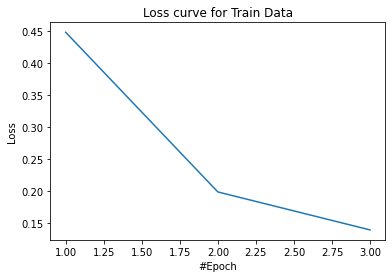

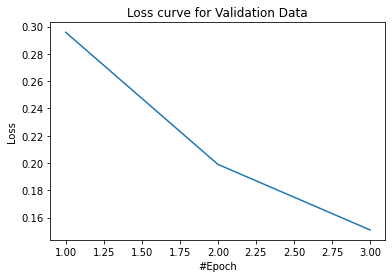

Review Classification Accuracy on Test Data =  96.20  %
--------------------------------------------------------
Filter Size = 7; No of Neurons in Hidden Layer = 128
At Epoch Number: 1; Train Loss= 0.46; Validation Loss= 0.29
At Epoch Number: 2; Train Loss= 0.19; Validation Loss= 0.19
At Epoch Number: 3; Train Loss= 0.13; Validation Loss= 0.14


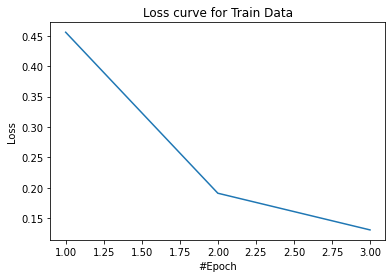

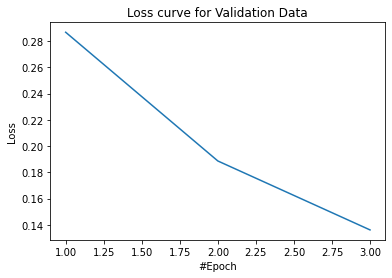

Review Classification Accuracy on Test Data =  96.56  %
--------------------------------------------------------
Filter Size = 7; No of Neurons in Hidden Layer = 256
At Epoch Number: 1; Train Loss= 0.46; Validation Loss= 0.27
At Epoch Number: 2; Train Loss= 0.18; Validation Loss= 0.17
At Epoch Number: 3; Train Loss= 0.12; Validation Loss= 0.12


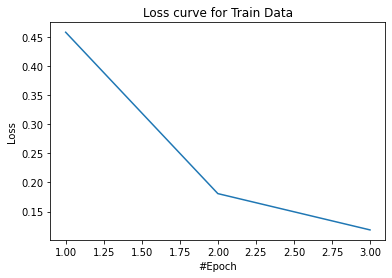

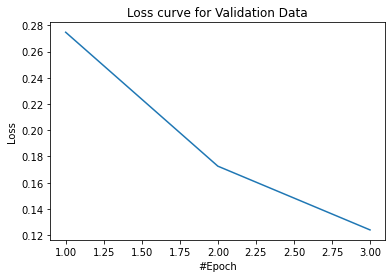

Review Classification Accuracy on Test Data =  96.88  %
--------------------------------------------------------


In [13]:
nFilters = 128
filters = [3, 5, 7]
paddingList = [1, 2, 3]
hiddenLayerSizes = [128, 256]
for i in range(len(filters)):
    for noOfNeuronsInHiddenLayer in hiddenLayerSizes:
        obj_CNN = nn.Sequential(
            nn.Conv2d(1, nFilters, kernel_size=filters[i], stride=1, padding=paddingList[i]),
            nn.ReLU(),
            nn.Flatten(),
            nn.Linear(imageSize*nFilters, noOfNeuronsInHiddenLayer),
            nn.ReLU(),
            nn.Linear(noOfNeuronsInHiddenLayer, noOfNeuronsInHiddenLayer),
            nn.ReLU(),
            nn.Linear(noOfNeuronsInHiddenLayer, noOfClasses)
        )
        print('\033[1m' + "Filter Size = " + str(filters[i]) + "; No of Neurons in Hidden Layer = " + str(noOfNeuronsInHiddenLayer)  + '\033[0m')
        tempObj = CNN(3,obj_CNN)
        tempObj.fit()
        tempObj.plotLossCurve(0)
        tempObj.plotLossCurve(1)
        tempObj.predict()
        del(obj_CNN)
        del(tempObj)
        print("--------------------------------------------------------")
        

I have tested CNN with 6 cases (i.e., filters = [3, 5, 7] and hiddenLayerSizes = [128, 256]). And getting a maximum accuracy of 96.98% with Filter Size = 7; No of Neurons in Hidden Layer = 128 & 256 with #Epochs = 3. Loss Curve for all the cases are shown.
It is observed that increasing the kernel size and increasing the number of neurons in hidden layer is increasing the accuracy on the test data. Increasing no of neurons in hidden layer means increasing the connections between the layers which results in better performance.